# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. 

**Задача** - Используя данные, определить рыночную стоимость объектов недвижимости и типичные параметры квартир

**Описание данных**:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Загрузка данных и изучение общей информацию. 

In [1]:
#используемые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Посмотрим, все ли корректно открывается
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


In [5]:
#Проверим таблицу
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
#Выведем  первые 20 строк датафрейма на экран
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [7]:
#Посмотрим информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Количество ненулевых значений варьируется для каждого столбца. Некоторые столбцы содержат пропущенные значения (NaN).
Некоторые типы данных, такие как first_day_exposition и is_apartment, и тд могут потребовать дополнительной обработки или преобразования для более удобного анализа данных.

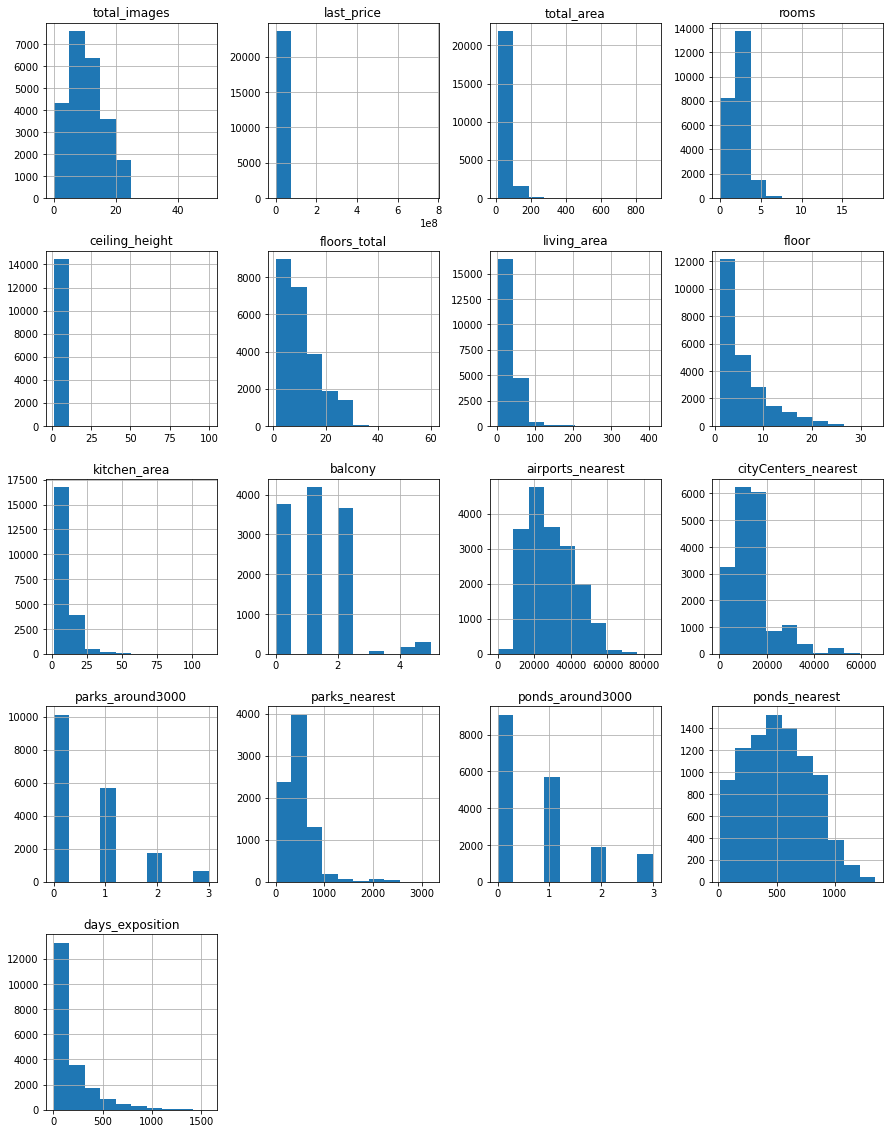

In [8]:
data.hist(figsize=(15, 20));

**Вывод:**

Имеются пропущенные значения в: ceiling_height, living_area, is_apartment, kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_neares, ponds_around3000, ponds_nearest, days_exposition. Также есть выбросы и данные, тип которых нужно поменять. Данные требуют дополнительной обработки

### Предобработка данных

#### Выведем количество пропущенных значений для каждого столбца, используя комбинацию двух методов.

In [9]:
#Выведем количество пропущенных значений для каждого столбца
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Согласно полученным данным, в датафрейме имеются пропущенные значения в: ceiling_height - 9195, living_area- 1903, is_apartment - 20924, kitchen_area-2278, balcony-11519, locality_name- 49б  airports_nearest-5542, cityCenters_nearest -5519, parks_around3000 -5518, parks_neares-15620, ponds_around3000 - 5518, ponds_nearest - 14589, days_exposition- 3181. Данные пропуски могут возникнуть из-за недостатка информации, ошибок при заполнении объявлений, неполного сбора данных или нежелания продавцов предоставлять определенную информацию.

#### Обработка пропусков
В случае с ceiling_height (высота потолков) можно заполнить пропущенные значения медианой. Это обеспечит статистический баланс и не исказит распределение данных.

In [10]:
# Рассчитываем медиану высоты потолков
median_ceiling_height = data['ceiling_height'].median()

In [11]:
# Заполняем пропущенные значения медианой
data['ceiling_height'].fillna(median_ceiling_height, inplace=True)

In [12]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пропущенные значения удалось полностью заменить.

Если бы у нас были данные о том, в каком доме находятся представленные квартиры, то можно было бы заполнить пропущенные данные по этажности дома floors_total. Но, поскольку таких данных нет и пропусков не много, то мы просто удалим эти пропуски. Также поступим и со столбцом locality_name

In [13]:
#удалим пропуски в столбце floors_total методом dropna()
data = data.dropna(subset=['floors_total','locality_name'])

In [14]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [15]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Все получилось

Для столбца is_apartment (апартаменты), если большинство значений - False (не апартаменты), можно предположить, что пропущенные значения также относятся к не апартаментам и заполнить их False. Однако, если посмотреть на информацию по датафрейму, то тип данного столбца - object. Поэтому для начала проверим уникальные значения столба is_apartment

In [16]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [17]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [18]:
data['is_apartment'].unique()

array([False,  True])

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Как видим, после замены пропусков на False тип данных стал bool

Если информации о балконах в столбце balcony в объявлении нет, то, возможно, владелец не указывал их количество. В этом случае можно заполнить пропуски нулями.

In [20]:
#Посмотрим на уникальные значения этого столбца, так как тип данных float64, а не int64. Так как не может быть к примеру 
#1,5 балкона
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [21]:
#заполняем пропуски нулями с помощью fillna
data['balcony'] = data['balcony'].fillna(0)

In [22]:
#поменяем тип данных на int
data['balcony'] = data['balcony'].astype(int)

In [23]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  int64  
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [25]:
data['balcony'].unique()

array([0, 2, 1, 5, 4, 3])

В случае со столбцом living_area (жилая площадь), можно рассчитать отношение жилой площади к общей и применить это отношение к общей площади для заполнения пропусков в жилой площади.

In [26]:
# Рассчитаем средние отношения жилой площади к общей площади
mean_living_area_ratio = (data['living_area'] / data['total_area']).mean()

In [27]:
# Заполняем пропуски в жилой площади
data['living_area'].fillna(data['total_area'] * mean_living_area_ratio, inplace=True)

В случае со столбцом kitchen_area (площадь кухни), можно рассчитать отношение кухни к общей площади и применить это отношение к общей площади для заполнения пропусков в жилой площади.

In [28]:
# Рассчитаем средние отношения кухни к общей площади
mean_kitchen_area_ratio = (data['kitchen_area'] / data['total_area']).mean()

In [29]:
#Попробуем заполнить 
data['kitchen_area'].fillna(data['total_area'] * mean_kitchen_area_ratio, inplace=True)

In [30]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [31]:
#округлим данные столбцов living_area и kitchen_area до 2-х знаков после запятой
data['living_area'] = data['living_area'].round(2)
data['kitchen_area'] = data['kitchen_area'].round(2)

In [32]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Как видно, по данным столбцам, пропуски удалось заменить

Скорее всего, по многим локациям данные airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest (расстояния и количество парков/водоёмов) не заполнены (NaN). Удалить такое количество мы не можем, заполнить медианным или средним значением по всем локациям будет также некорректно, поэтому попробуем оставить так как есть.

In [33]:
#Проверим уникальные значения столбца locality_name
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Согласно полученным данным, видно, что есть много ошибок в наименовании населенных пунктов. К примеру, Мурино, посЕлок Мурино и посЁлок Мурино, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана», 'городской поселок Янино-1' и 'городской посёлок Янино-1', 'деревня Кудрово' и Кудрово, 'поселок городского типа Красный Бор' и 'посёлок городского типа Красный Бор', 'поселок городского типа Лебяжье' и 'посёлок городского типа Лебяжье', 'поселок городского типа Кузьмоловский' и 'посёлок городского типа Кузьмоловский','посёлок Аннино' и 'поселок Аннино', 'поселок Победа' и 'посёлок Победа', 'поселок городского типа Советский' и 'городской посёлок Советский', и тд

Судя по всему наибольшее количество ошибок связано с тем, что в одном случае в наименовании пишут е, а в другом ё. Для простоты замены, заменим "ё" в наименованиях населенных пунктов на "е"

In [34]:
#Для замены символов в столбце 'locality_name' можно использовать метод str.replace()
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [35]:
#Посмотрим теперь на наименования населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Осталось исправить следующие ошибки в написании названий: Мурино и посЕлок Мурино, «поселок Рябово» и «поселок городского типа Рябово», 'деревня Кудрово' и Кудрово, 'поселок городского типа Советский' и 'городской поселок Советский', 'городской поселок Большая Ижора' и 'поселок городского типа Большая Ижора', 'городской поселок Павлово' и 'село Павлово' и 'поселок городского типа Павлово', 'городской поселок Лесогорский' и 'поселок городского типа Лесогорский', 'деревня Щеглово' и 'поселок Щеглово','городской поселок Федоровское и  'деревня Федоровское', 'поселок Зимитицы и 'деревня Зимитицы', 'поселок Рябово' и     'поселок городского типа Рябово', 'городской поселок Мга' и 'поселок городского типа Мга', 'поселок станции Вещево' и 'поселок при железнодорожной станции Вещево', 'деревня Калитино' и 'поселок Калитино', 'поселок городского типа Приладожский' и 'садовое товарищество Приладожский', 'деревня Рабитицы' и 'поселок Рабитицы', 'городской поселок Назия' и 'поселок городского типа Назия', 'деревня Гарболово' и 'поселок Гарболово', 'поселок станции Приветнинское' и 'поселок при железнодорожной станции Приветнинское', 'Любань' и 'поселок Любань', Никольское и 'село Никольское', 'поселок городского типа Рощино' и 'городской поселок Рощино', 'поселок станции Громово' и 'поселок Громово', 'поселок Лесное' и 'коттеджный поселок Лесное'.

In [36]:
#исправим оставшиеся названия
data['locality_name'] = data['locality_name'].replace({
    'посёлок Мурино': 'Мурино',
    'поселок Рябово': 'посёлок городского типа Рябово',
    'Кудрово': 'деревня Кудрово',
    'поселок городского типа Советский': 'городской поселок Советский',
    'городской поселок Большая Ижора': 'поселок городского типа Большая Ижора',
    'городской поселок Павлово': 'поселок городского типа Павлово',
    'городской поселок Лесогорский': 'поселок городского типа Лесогорский',
    'деревня Щеглово': 'поселок Щеглово',
    'городской поселок Федоровское': 'деревня Федоровское',
    'поселок Зимитицы': 'деревня Зимитицы',
    'поселок Рябово': 'поселок городского типа Рябово',
    'городской поселок Мга': 'поселок городского типа Мга',
    'поселок станции Вещево': 'поселок при железнодорожной станции Вещево',
    'деревня Калитино': 'поселок Калитино',
    'поселок городского типа Приладожский': 'садовое товарищество Приладожский',
    'деревня Рабитицы': 'поселок Рабитицы',
    'городской поселок Назия': 'поселок городского типа Назия',
    'деревня Гарболово': 'поселок Гарболово',
    'поселок станции Приветнинское': 'поселок при железнодорожной станции Приветнинское',
    'Любань': 'поселок Любань',
    'Никольское': 'село Никольское',
    'поселок городского типа Рощино': 'городской поселок Рощино',
    'поселок станции Громово': 'поселок Громово',
    'поселок Лесное': 'коттеджный поселок Лесное'
})

In [37]:
#Посмотрим теперь на наименования населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

Скорее всего, по многим локациям данные airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest (расстояния и количество парков/водоёмов) не заполнены (NaN). Удалить такое количество мы не можем, заполнить медианным или средним значением по всем локациям будет также некорректно, поэтому попробуем оставить так как есть

В случае с days_exposition, если есть пропуск, то значит квартира не продана. Эти пропуски заполнять не будем

Осталось поменять формат данных в столбцах  first_day_exposition, floors_total, parks_around3000  и ponds_around3000 

In [38]:
#Изменим тип данных с float64 на int64 для столбцов: floors_total и days_exposition
#Так как не может быть к примеру 1.5 этажа 
data['floors_total'] = data['floors_total'].astype(int)

In [39]:
#Поскольку в days_exposition мы оставили пропуски незаполненными, то чтобы поменять на формат int64, применим другой подход
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')

In [40]:
#Изменим тип данных с float64 на int64 для столбцов: parks_around3000  и ponds_around3000 
#Так как не может быть к примеру 1.5 парка или 1.5 водоема 
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], errors='coerce')).astype('Int64')
data['ponds_around3000'] = np.floor(pd.to_numeric(data['ponds_around3000'], errors='coerce')).astype('Int64')

В библиотеке pandas для работы с датами используется тип данных datetime64. В нашей таблице first_day_exposition представлен в формате object. 

In [41]:
# приведем first_day_exposition к объекту datetime используя pd.to_datetime()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [42]:
#Посмотрим на общую информацию 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [43]:
#Посмотрим на полученную таблицу
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,14.40,5,False,False,False,9.10,0,городской поселок Янино-1,NaN,NaN,<NA>,NaN,<NA>,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,10.60,6,False,False,False,14.40,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,40.45,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,15.43,26,False,False,False,8.81,0,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


In [44]:
#посмотрим,удалось ли заменить пропуски
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Все в порядке, пропуски удалось заменить

Вывод: В ходе предварительной обработки данных были обнаружены пропуски в столбцах ceiling_height - 9195, living_area- 1903, is_apartment - 20924, kitchen_area-2278, balcony-11519, locality_name- 49б airports_nearest-5542, cityCenters_nearest -5519, parks_around3000 -5518, parks_neares-15620, ponds_around3000 - 5518, ponds_nearest - 14589, days_exposition- 3181. Во всех столбцах, кроме как days_exposition, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest  удалось полностью заменить пропуски. Для большого количества обьявлений (ок 5000-15000) обнаружено отсутствие данных по столбцам airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, которые невозможно было логически заменить, но поскольку таких пропусков много, мы их не удалили. Также было исправлено большое количество ошибок в названиях locality_name и тип некоторых данных. 

#### Посчитаем и добавим в таблицу новые столбцы

In [45]:
#Рассчитаем цену за квадратный метр и добавим новый столбец
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [46]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00


In [47]:
#Добавим столбец с номерами дней недели (0 - понедельник, 1 - вторник и так далее)
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

In [48]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1


In [49]:
data['month'] = data['first_day_exposition'].dt.month

In [50]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6


In [51]:
#Добавим столбец с годом публикации объявления
data['year'] = data['first_day_exposition'].dt.year

In [52]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018


In [53]:
# Добавим столбец с типом этажа квартиры
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [54]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой


In [55]:
#Добавим в таблицу расстояние в км до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000

In [56]:
#округлим до целых значений
data['cityCenters_nearest_km'] = np.floor(pd.to_numeric(data['cityCenters_nearest_km'], errors='coerce')).astype('Int64')

In [57]:
#посчитаем last_price в млн, что бы в дальнейщем было проще визуализировать эти данные
data['last_price'] = data['last_price']/1000000

In [58]:
#Посмотрим на полученный датафрейм
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,120370.37,3,3,2019,другой,16
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,82920.79,1,12,2018,первый,18
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.71,3,8,2015,другой,13
3,0,64.900,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,6
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8


**Вывод:**

В ходе выполнения анализа были посчитаны и добавлены следующие столбцы к имеющемуся датафрейму: 1) цена одного квадратного метра, 2) день публикации объявления, 3) месяц публикации объявления, 4) год публикации объявления, 5) тип этажа квартиры (значения — «первый», «последний», «другой»), 6) расстояние в км до центра города.

### Исследовательский анализ данных

Далее проведем исследовательский анализ распределения данных для полученных объявлений. Для этого, построим гистограммы по следующим параметрам: общая площадь; жилая площадь; площадь кухни; цена объекта; количество комнат; высота потолков; этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме; расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка; день и месяц публикации объявления.
Начнем с общей площади:

#### Анализ общей площади квартир

Text(0.5, 1.0, 'Гистограмма по общей площади')

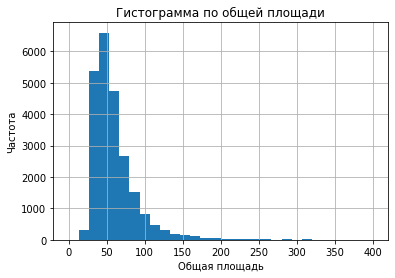

In [59]:
#Построим гистограмму по общей площади с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['total_area'].hist(bins=30, range=(0,400))
# Добавим подписи осей и заголовка
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.title('Гистограмма по общей площади')

Как видно, большинство обьявлений составляют квартиры со средней общей площадью ок 50м2. В квартире площадью 50 квадратов может быть 1-3 комнаты. Это может быть студия, улучшенная двушка или малогабаритная трёшка, все зависит от типа дома. Квартиры средней площади могут быть популярны среди покупателей из-за своей относительной доступности, а также потому, что они могут соответствовать потребностям разных категорий покупателей, включая молодые семьи, одиноких жителей и даже инвесторов.
Согласно графику, после 200м квартир практически нет, а после 320 линии даже не видно. В данном случае аномальными значениями можно считать все квартиры больше 200-300м. Значит эти значения нужно отбросить. 

In [60]:
#Удалим аномалии в столбце total_area
data = data.query('total_area < 200')

In [61]:
#Проверим есть ли такие квартиры
data.query('rooms>200')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по общей площади')

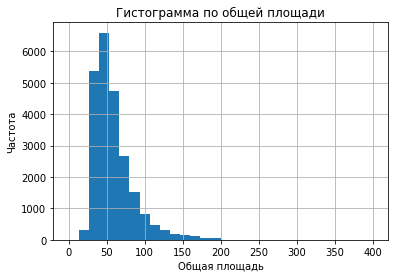

In [62]:
#Проверим по гистограмме
data['total_area'].hist(bins=30, range=(0,400))
# Добавим подписи осей и заголовка
plt.xlabel('Общая площадь')
plt.ylabel('Частота')
plt.title('Гистограмма по общей площади')

На гистограмме также не видно значений после 200 м2

#### Анализ жилой площади квартир

Text(0.5, 1.0, 'Гистограмма по жилой площади')

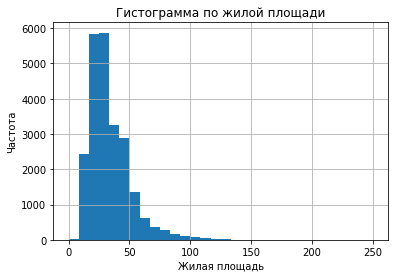

In [63]:
#Построим гистограмму по жилой площади с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['living_area'].hist(bins=30, range=(0,250))
# Добавим подписи осей и заголовка
plt.xlabel('Жилая площадь')
plt.ylabel('Частота')
plt.title('Гистограмма по жилой площади')

К жилой площади относятся только те помещения, которые пригодны для проживания: гостиная, спальня, детская. Сюда не относятся: кухня, санузлы, коридор, кладовые и гардеробные. Согласно полученной гистограмме, в наибольшем количестве квартир жилая площадь составляет ок 20-30м2.

#### Анализ площади кухни в квартирах

Text(0.5, 1.0, 'Гистограмма по площади кухни')

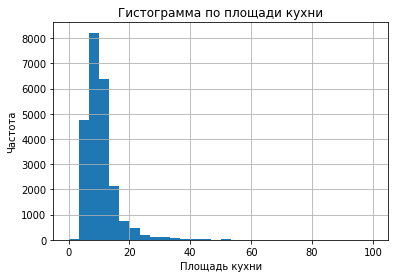

In [64]:
#Построим гистограмму по площади кухни с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['kitchen_area'].hist(bins=30, range=(0,100))
# Добавим подписи осей и заголовка
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.title('Гистограмма по площади кухни')

Согласно полученной гистограмме, в наибольшем количестве квартир площадь кухни составляет ок 10м2. После 40м2  квартир практически нет, поэтому более 40 м2 можно считать аномальными Значит эти значения нужно отбросить. Также можно отбросить значения меньше 3 м2

In [65]:
#Посмотрим на эти значения в таблице
data.query('kitchen_area > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
4,2,10.00,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.00,1,6,2018,другой,8
51,7,45.00,161.0,2017-10-17,3,3.20,8,38.0,4,False,False,False,50.0,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,541,279503.11,1,10,2017,другой,6
263,12,39.90,140.6,2016-11-19,2,3.50,8,39.8,7,False,False,False,49.2,4,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,<NA>,283783.78,5,11,2016,другой,6
511,7,5.95,69.0,2017-12-21,1,2.65,16,13.0,12,False,False,False,50.0,1,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,56,86231.88,3,12,2017,другой,<NA>
656,10,18.50,131.0,2018-10-11,3,2.80,20,64.0,19,False,False,False,50.0,0,Санкт-Петербург,39771.0,8672.0,1,139.0,0,NaN,53,141221.37,3,10,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20969,18,13.30,133.0,2015-02-11,4,3.00,5,58.0,2,False,False,False,45.0,0,Санкт-Петербург,24653.0,5032.0,0,NaN,1,534.0,1512,100000.00,2,2,2015,другой,5
21081,11,9.70,85.2,2018-08-04,2,2.65,8,38.0,2,False,False,False,41.1,0,Санкт-Петербург,48523.0,16361.0,0,NaN,0,NaN,36,113849.77,5,8,2018,другой,16
21331,15,16.00,93.4,2019-03-26,3,2.80,17,24.3,6,False,False,False,49.4,0,Санкт-Петербург,30954.0,8248.0,0,NaN,2,495.0,<NA>,171306.21,1,3,2019,другой,8
21699,20,29.00,193.0,2017-07-10,3,3.35,6,111.0,3,False,False,False,42.0,0,Санкт-Петербург,24564.0,4782.0,1,674.0,0,NaN,224,150259.07,0,7,2017,другой,4


In [66]:
#Посмотрим на эти значения в таблице
data.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
906,15,2.600000,27.00,2017-07-10,1,2.75,23,18.00,18,False,False,False,2.00,0,Санкт-Петербург,22131.0,17459.0,0,NaN,1,411.0,10,96296.30,0,7,2017,другой,17
6262,9,3.100000,24.00,2018-06-25,2,3.00,5,16.00,5,False,False,False,2.00,0,Санкт-Петербург,31960.0,4914.0,2,426.0,1,936.0,54,129166.67,0,6,2018,последний,4
7950,3,5.967734,66.40,2017-02-07,2,2.65,4,44.40,2,False,False,False,2.89,0,Санкт-Петербург,44870.0,20802.0,0,NaN,0,NaN,335,89875.51,1,2,2017,другой,20
8729,9,2.200000,18.40,2018-08-20,1,2.52,3,14.00,3,False,False,False,2.40,0,Пушкин,20710.0,30687.0,0,NaN,1,155.0,59,119565.22,0,8,2018,последний,30
8886,10,2.450000,15.50,2018-08-22,0,2.65,5,10.00,2,False,True,False,2.90,0,Санкт-Петербург,24326.0,4589.0,0,NaN,1,446.0,27,158064.52,2,8,2018,другой,4
9138,17,2.920000,23.29,2018-12-12,1,2.65,3,21.00,1,False,False,False,2.00,0,Санкт-Петербург,19506.0,4008.0,0,NaN,2,45.0,107,125375.70,2,12,2018,первый,4
11033,6,5.350000,32.00,2016-04-20,1,2.65,14,16.00,10,False,False,False,2.00,0,Санкт-Петербург,19008.0,3953.0,0,NaN,1,69.0,210,167187.50,2,4,2016,другой,3
12040,5,1.900000,15.00,2018-06-27,1,2.50,5,8.47,1,False,False,False,2.81,0,Сосновый Бор,NaN,NaN,<NA>,NaN,<NA>,NaN,45,126666.67,2,6,2018,первый,<NA>
16367,2,2.720000,25.70,2017-10-30,1,2.65,19,22.60,11,False,False,False,2.00,0,Санкт-Петербург,14472.0,13268.0,0,NaN,0,NaN,109,105836.58,0,10,2017,другой,13
16949,9,1.550000,15.00,2018-08-21,1,2.70,9,8.47,1,False,False,False,2.81,0,Санкт-Петербург,51048.0,16376.0,0,NaN,1,1079.0,42,103333.33,1,8,2018,первый,16


In [67]:
#Удалим аномалии в столбце kitchen_area
data = data.query('3<kitchen_area < 40')

In [68]:
#Пороверим
data.query('kitchen_area > 40')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


In [69]:
#Пороверим
data.query('kitchen_area < 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по площади кухни')

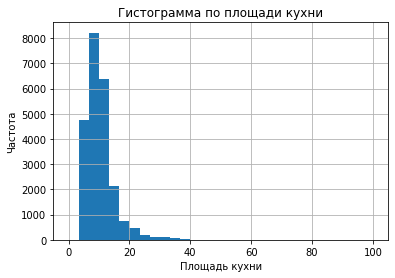

In [70]:
#Проверим по гистограмме
data['kitchen_area'].hist(bins=30, range=(0,100))
# Добавим подписи осей и заголовка
plt.xlabel('Площадь кухни')
plt.ylabel('Частота')
plt.title('Гистограмма по площади кухни')

Все аномальные значения удалены

#### Анализ стоимости квартир

Text(0.5, 1.0, 'Гистограмма по стоимости квартиры')

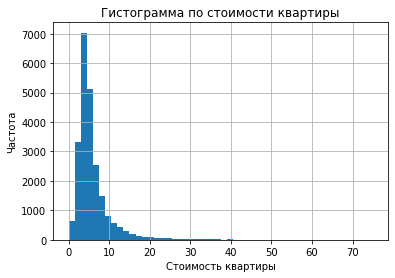

In [71]:
#Построим гистограмму по стоимости квартиры с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['last_price'].hist(bins=50, range=(0,75))
# Добавим подписи осей и заголовка
plt.xlabel('Стоимость квартиры')
plt.ylabel('Частота')
plt.title('Гистограмма по стоимости квартиры')

In [72]:
#Проверим есть ли квартиры < 1 млн
data.query('last_price<1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
164,6,0.80,40.3,2018-06-25,2,2.65,3,22.77,1,False,False,False,7.55,2,поселок городского типа Ефимовский,NaN,NaN,<NA>,NaN,<NA>,NaN,81,19851.12,0,6,2018,первый,<NA>
247,7,0.65,31.0,2017-01-20,1,2.65,3,17.51,1,False,False,False,5.81,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,378,20967.74,4,1,2017,первый,<NA>
259,6,0.90,30.0,2017-11-21,1,2.50,5,15.00,4,False,False,False,5.00,1,Ивангород,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,30000.00,1,11,2017,другой,<NA>
268,7,0.65,46.0,2018-03-15,2,2.50,5,30.00,5,False,False,False,7.00,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,75,14130.43,3,3,2018,последний,<NA>
293,2,0.90,42.8,2017-06-14,2,2.65,5,32.00,5,False,False,False,5.00,0,Сясьстрой,NaN,NaN,<NA>,NaN,<NA>,NaN,247,21028.04,2,6,2017,последний,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23067,8,0.60,31.8,2019-04-24,1,2.65,2,20.00,1,False,False,False,7.00,0,деревня Коркино,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,18867.92,2,4,2019,первый,<NA>
23153,9,0.65,41.0,2017-10-13,2,2.65,3,28.00,1,False,False,False,6.00,0,Бокситогорск,NaN,NaN,<NA>,NaN,<NA>,NaN,14,15853.66,4,10,2017,первый,<NA>
23354,18,0.90,42.6,2018-02-26,2,2.65,2,28.00,1,False,False,False,9.00,0,деревня Тихковицы,NaN,NaN,<NA>,NaN,<NA>,NaN,219,21126.76,0,2,2018,первый,<NA>
23484,11,0.47,44.5,2018-07-02,2,2.65,2,28.00,2,False,False,False,7.50,0,Сланцы,NaN,NaN,<NA>,NaN,<NA>,NaN,298,10561.80,0,7,2018,последний,<NA>


Большинство квартир стоит ок 5млн руб. Есть редкие квартиры, стоящие ок 50-60 млн. Самая дешевая квартира стоит 470 тыс. руб. Аномальными значениями можно считать квартиры, стоящие более 25 млн. Удалим их

In [73]:
#Посмотрим на эти значения в таблице
data.query('last_price > 25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
3,0,64.900,159.0,2015-07-24,3,2.65,14,89.83,9,False,False,False,29.79,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.10,4,7,2015,другой,6
121,20,33.000,180.0,2017-02-17,3,2.90,9,86.00,8,False,False,False,24.00,4,Санкт-Петербург,25689.0,4264.0,1,633.0,0,NaN,144,183333.33,4,2,2017,другой,4
147,10,27.700,179.6,2017-07-06,5,2.85,25,97.20,25,False,False,False,33.80,2,Санкт-Петербург,19424.0,4489.0,0,NaN,1,806.0,75,154231.63,3,7,2017,последний,4
282,17,37.000,115.0,2018-11-15,2,2.65,5,65.00,2,False,False,False,14.00,0,Санкт-Петербург,23537.0,1995.0,2,121.0,2,663.0,158,321739.13,3,11,2018,другой,1
411,1,40.662,151.0,2014-12-09,3,2.65,8,85.00,3,False,False,False,23.00,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,594,269284.77,1,12,2014,другой,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,20,33.000,186.0,2017-10-11,3,3.00,5,130.00,3,False,False,False,16.00,1,Санкт-Петербург,24785.0,3359.0,0,NaN,0,NaN,138,177419.35,2,10,2017,другой,3
23299,20,25.900,167.1,2017-08-28,4,2.75,15,102.30,6,False,False,False,22.30,1,Санкт-Петербург,29860.0,7232.0,0,NaN,3,212.0,110,154997.01,0,8,2017,другой,7
23395,4,40.000,188.0,2017-05-29,6,2.65,6,109.51,4,False,False,False,31.30,0,Санкт-Петербург,23390.0,2254.0,2,425.0,1,62.0,30,212765.96,0,5,2017,другой,2
23446,19,27.000,110.0,2016-03-11,3,2.65,7,63.00,5,False,False,False,15.00,1,Санкт-Петербург,26819.0,5026.0,1,657.0,1,678.0,200,245454.55,4,3,2016,другой,5


In [74]:
#Удалим аномалии в столбце last_price
data = data.query('last_price < 25')

In [75]:
#Пороверим
data.query('last_price > 25')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по стоимости квартиры')

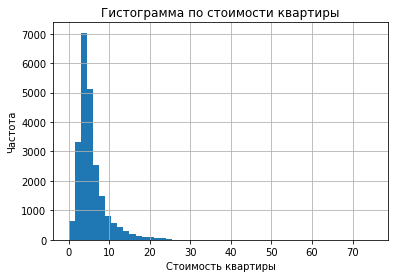

In [76]:
#Проверим по гистограмме
data['last_price'].hist(bins=50, range=(0,75))
# Добавим подписи осей и заголовка
plt.xlabel('Стоимость квартиры')
plt.ylabel('Частота')
plt.title('Гистограмма по стоимости квартиры')

Все аномальные значения успешно удалены

#### Анализ количества комнат в квартирах

Text(0.5, 1.0, 'Гистограмма по количеству комнат')

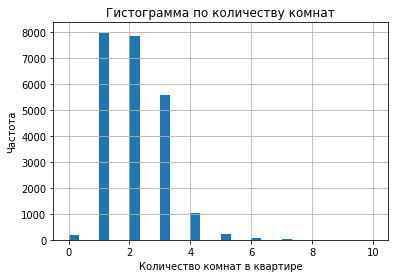

In [77]:
#Построим гистограмму по количеству комнат с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['rooms'].hist(bins=30, range=(0,10))
# Добавим подписи осей и заголовка
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству комнат')

Как видим наше предположение о 1-3 комнатных квартирах подтвердилось. Но что за квартиры, где количество комнат =0? 

In [78]:
#Проверим есть ли такие квартиры
data.query('rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
144,1,2.450,27.00,2017-03-30,0,2.65,24,15.50,2,False,True,False,5.06,2,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,181,90740.74,3,3,2017,другой,<NA>
349,4,2.320,25.00,2017-09-27,0,2.65,14,17.00,1,False,False,True,4.68,0,деревня Кудрово,NaN,NaN,<NA>,NaN,<NA>,NaN,45,92800.00,2,9,2017,первый,<NA>
440,8,2.480,27.11,2018-03-12,0,2.65,17,24.75,4,False,True,False,5.08,2,Санкт-Петербург,38171.0,15015.0,0,NaN,2,982.0,64,91479.16,0,3,2018,другой,15
508,0,3.375,34.40,2017-03-28,0,2.65,26,24.30,19,False,False,True,6.44,1,поселок Парголово,53115.0,19292.0,0,NaN,1,593.0,430,98110.47,1,3,2017,другой,19
608,2,1.850,25.00,2019-02-20,0,2.65,10,14.12,7,False,True,False,4.68,0,поселок Шушары,NaN,NaN,<NA>,NaN,<NA>,NaN,29,74000.00,2,2,2019,другой,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23210,7,3.200,26.00,2017-09-01,0,2.65,25,18.00,16,False,True,False,4.87,0,Санкт-Петербург,11405.0,13222.0,0,NaN,1,623.0,14,123076.92,4,9,2017,другой,13
23442,0,2.500,27.70,2017-09-28,0,2.65,24,18.00,4,False,False,True,5.19,2,поселок Мурино,NaN,NaN,<NA>,NaN,<NA>,NaN,4,90252.71,3,9,2017,другой,<NA>
23554,15,3.350,26.00,2018-09-07,0,2.65,19,14.69,8,False,True,False,4.87,0,Санкт-Петербург,18090.0,17092.0,0,NaN,2,112.0,31,128846.15,4,9,2018,другой,17
23592,10,1.450,29.00,2017-11-11,0,2.65,9,18.00,8,False,False,True,5.43,2,село Никольское,NaN,NaN,<NA>,NaN,<NA>,NaN,82,50000.00,5,11,2017,другой,<NA>


Действительно, такие квартиры есть (194 объявления), что является странным. Это может быть результатом различных ситуаций или ошибок. Несколько возможных объяснений: 1) Ошибка в данных. Возможно, при вводе данных произошла ошибка, и значение было неправильно введено или отсутствует. 2) Технический сбой или недоразумение. Иногда при сборе данных могут возникнуть технические сбои или недоразумения, приводящие к некорректным значениям. 3) Специфика объявления. Некоторые объявления могут представлять собой особые объекты, такие как студии или коммерческие помещения, где традиционные комнаты не имеют смысла.
Поскольку таких данных немного, и нет возможности узнать что это за тип квартиры, то мы их просто удалим

In [79]:
data = data.query('rooms != 0')

In [80]:
#Проверим остались ли такие квартиры
data.query('rooms==0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по количеству комнат')

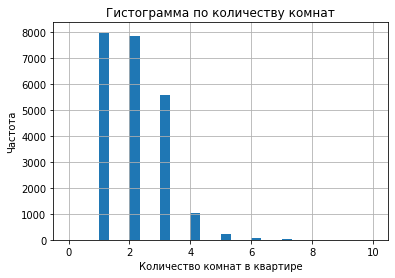

In [81]:
#Теперь построим гистограмму по обновленным данным
data['rooms'].hist(bins=30, range=(0,10))
# Добавим подписи осей и заголовка
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству комнат')

Теперь все впорядке, наибольшее количество объявлений составляют 1-3 комнатные квартиры.

Аномальными значениями также являются квартиры с комнатами больше 6 комнат. Удалим их

In [82]:
#Удалим аномалии в столбце last_price
data = data.query('rooms < 6')

In [83]:
#Проверим остались ли такие квартиры
data.query('rooms > 6')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по количеству комнат')

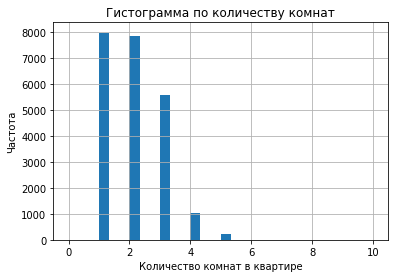

In [84]:
#Проверим по гистограмме
data['rooms'].hist(bins=30, range=(0,10))
# Добавим подписи осей и заголовка
plt.xlabel('Количество комнат в квартире')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству комнат')

Все аномальные значения успешно удалены

#### Анализ высоты комнат в квартирах

Text(0.5, 1.0, 'Гистограмма по высоте комнат')

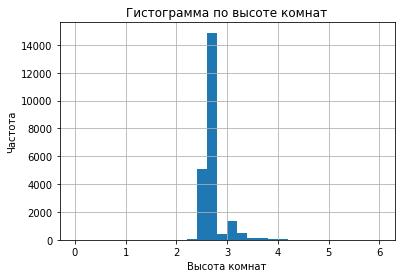

In [85]:
#Построим гистограмму по высоте комнат с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['ceiling_height'].hist(bins=30, range=(0,6))
# Добавим подписи осей и заголовка
plt.xlabel('Высота комнат')
plt.ylabel('Частота')
plt.title('Гистограмма по высоте комнат')

Согласно полученной гистограмме, в большинстве квартир высота потолков ок 2,5-2,7 м. Эти данные согласуются с литературными данными, согласно которым в массовом сегменте высота потолков колеблется от 2,5 до 2,7 м. Это оптимальный показатель, который обеспечивает комфортность проживания. Есть также небольшое количество квартир с высотой потолков 3–3,5 метра. Такая высота характерна для сталинок и каких-то квартир класса премиум, бизнес.
Аномальные значения тут от до 2.5м и более 3.5м

In [86]:
#Удалим аномалии в столбце last_price
data = data.query('2.5<=ceiling_height<=3.5')

In [87]:
#Проверим остались ли такие квартиры
data.query('ceiling_height<2.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


In [88]:
#Проверим остались ли такие квартиры
data.query('ceiling_height>3.5')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km


Text(0.5, 1.0, 'Гистограмма по высоте комнат')

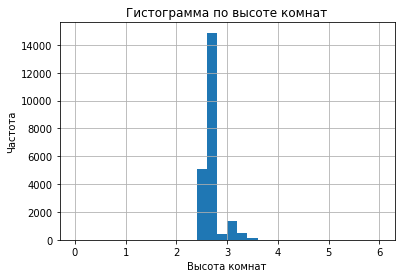

In [89]:
#Проверим по гистограмме
data['ceiling_height'].hist(bins=30, range=(0,6))
# Добавим подписи осей и заголовка
plt.xlabel('Высота комнат')
plt.ylabel('Частота')
plt.title('Гистограмма по высоте комнат')

Все аномальные значения успешно удалены

#### Анализ номера этажа квартиры

Text(0.5, 1.0, 'Гистограмма по номеру этажа квартиры')

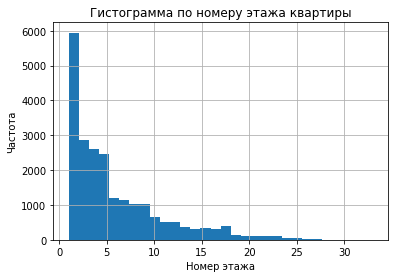

In [90]:
#Построим гистограмму по номеру этажа квартиры с помощью метода hist()
#Количество корзин было выбрано после предварительного построения графика
data['floor'].hist(bins=30)
# Добавим подписи осей и заголовка
plt.xlabel('Номер этажа')
plt.ylabel('Частота')
plt.title('Гистограмма по номеру этажа квартиры')

Согласно полученным данным, большинство квартир расположены на первых этажах (1-5)

#### Анализ типа этажа квартир

Text(0.5, 1.0, 'Гистограмма по типу этажа квартир')

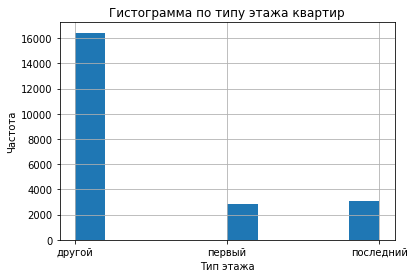

In [91]:
#Построим гистограмму по типу этажа квартир с помощью метода hist()
data['floor_type'].hist()
# Добавим подписи осей и заголовка
plt.xlabel('Тип этажа')
plt.ylabel('Частота')
plt.title('Гистограмма по типу этажа квартир')

Согласно полученным данным, большинство квартир расположены между 1-ым и последним этажом

#### Анализ общей этажности квартир

Text(0.5, 1.0, 'Гистограмма по общей этажности квартир')

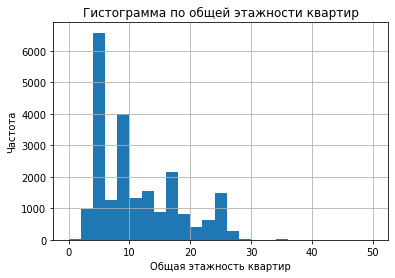

In [92]:
#Построим гистограмму по общей этажности квартир с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['floors_total'].hist(bins=25, range=(0,50))
# Добавим подписи осей и заголовка
plt.xlabel('Общая этажность квартир')
plt.ylabel('Частота')
plt.title('Гистограмма по общей этажности квартир')

Согласно полученным данным, большиство квартир представлены в пятиэтажных зданиях, затем идут 10- этажные, и тд. Редкие квартиры в домах с > 30 этажей

In [93]:
#Посмотрим есть ли одноэтажные здания
data.query('floors_total==1')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,day_of_week,month,year,floor_type,cityCenters_nearest_km
3076,20,2.000,80.0,2018-01-03,3,2.65,1,48.50,1,False,False,False,10.00,0,Волосово,NaN,NaN,<NA>,NaN,<NA>,NaN,44,25000.00,2,1,2018,первый,<NA>
4379,5,5.300,58.5,2017-11-15,2,2.65,1,31.60,1,False,False,False,9.40,0,городской поселок Рощино,NaN,NaN,<NA>,NaN,<NA>,NaN,226,90598.29,2,11,2017,первый,<NA>
5300,5,2.990,60.0,2018-11-15,3,2.65,1,50.00,1,False,False,False,10.00,0,поселок при железнодорожной станции Вещево,NaN,NaN,<NA>,NaN,<NA>,NaN,40,49833.33,3,11,2018,первый,<NA>
5698,7,0.450,42.0,2017-07-31,2,2.65,1,23.00,1,False,False,False,5.80,0,городской поселок Будогощь,NaN,NaN,<NA>,NaN,<NA>,NaN,233,10714.29,0,7,2017,первый,<NA>
5787,16,9.000,88.0,2018-08-06,3,2.65,1,49.71,1,False,False,False,16.49,0,Санкт-Петербург,44870.0,20802.0,0,NaN,1,792.0,60,102272.73,0,8,2018,первый,20
7962,4,0.550,46.2,2018-04-20,3,2.65,1,26.10,1,False,False,False,8.66,0,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,45,11904.76,4,4,2018,первый,<NA>
8335,10,2.700,80.0,2018-07-07,3,3.00,1,45.00,1,False,False,False,15.00,0,Луга,NaN,NaN,<NA>,NaN,<NA>,NaN,51,33750.00,5,7,2018,первый,<NA>
8388,20,3.550,48.2,2019-03-30,3,2.65,1,33.90,1,False,False,False,9.10,0,Сестрорецк,50046.0,31144.0,0,NaN,0,NaN,<NA>,73651.45,5,3,2019,первый,31
9517,4,1.200,39.4,2018-01-08,2,2.65,1,22.26,1,False,False,False,7.38,0,поселок Гаврилово,NaN,NaN,<NA>,NaN,<NA>,NaN,45,30456.85,0,1,2018,первый,<NA>
9752,16,0.850,62.0,2018-11-10,2,2.65,1,31.00,1,False,False,False,11.00,0,деревня Сижно,NaN,NaN,<NA>,NaN,<NA>,NaN,<NA>,13709.68,5,11,2018,первый,<NA>


В датафрейме представлены всего 25 квартир в одноэтажных зданиях

In [94]:
#Удалим значения выбивающиеся значения floors_total>30
data = data.query('floors_total <30')

Text(0.5, 1.0, 'Гистограмма по общей этажности квартир')

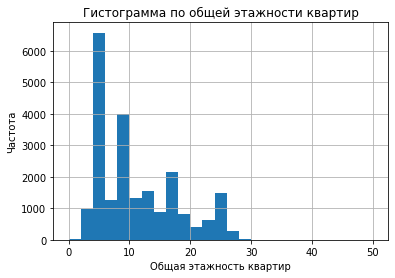

In [95]:
#Проверим по гистограмме
data['floors_total'].hist(bins=25, range=(0,50))
# Добавим подписи осей и заголовка
plt.xlabel('Общая этажность квартир')
plt.ylabel('Частота')
plt.title('Гистограмма по общей этажности квартир')

#### Анализ расстояния до центра города

Text(0.5, 1.0, 'Гистограмма по расстоянию до центра города')

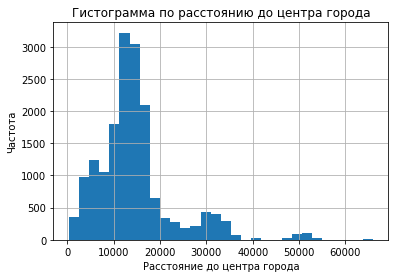

In [96]:
#Построим гистограмму по расстоянию до центра города в метрах с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['cityCenters_nearest'].hist(bins=30)
# Добавим подписи осей и заголовка
plt.xlabel('Расстояние до центра города')
plt.ylabel('Частота')
plt.title('Гистограмма по расстоянию до центра города')

Как мы помним, в этих данных есть ок 5000 тыс обьявлением со значением NaN. Метод hist() не учитывает эти данные и строит данные только по численным значениям, то есть по тем данным, что нам известны. Так, согласно полученным данным, большинство квартир расположены в 10-20 км от центра города. Есть и выбивающиеся данные с расстоянием ок 50 км, возможно, это самые отдаленные поселки и деревни. Квартиры вне центральной зоны города часто доступнее с точки зрения цены, что делает их привлекательными для тех, кто ищет более доступное жилье.

#### Анализ расстояния до ближайшего аэропорта

Text(0.5, 1.0, 'Гистограмма по расстоянию до ближайшего аэропорта')

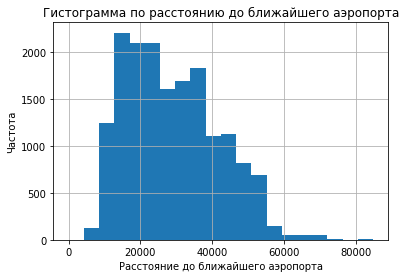

In [97]:
#Построим гистограмму по расстоянию до ближайшего аэропорта с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['airports_nearest'].hist(bins=20)
# Добавим подписи осей и заголовка
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Частота')
plt.title('Гистограмма по расстоянию до ближайшего аэропорта')

Как мы помним, в этих данных есть ок 5000 тыс обьявлением со значением NaN. Метод hist() не учитывает эти данные и строит данные только по численным значениям, то есть по тем данным, что нам известны. Согласно полученным данным, большинство квартир расположены в 20-30 км от ближайшего аэропорта. Есть малое количество с расстоянием более 80 км, возможно, это самые отдаленные поселки и деревни.

#### Анализ расстояния до ближайшего парка

Text(0.5, 1.0, 'Гистограмма по расстоянию до ближайшего парка')

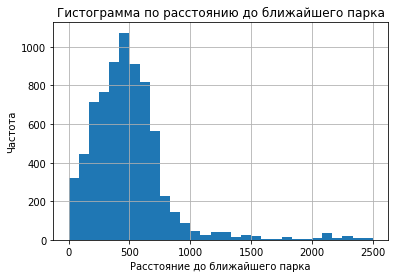

In [98]:
#Построим гистограмму по расстоянию до ближайшего парка с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['parks_nearest'].hist(bins=30, range=(0,2500))
# Добавим подписи осей и заголовка
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Частота')
plt.title('Гистограмма по расстоянию до ближайшего парка')

Как мы помним, в этих данных есть ок 5000 тыс обьявлением со значением NaN. Метод hist() не учитывает эти данные и строит данные только по численным значениям, то есть по тем данным, что нам известны. Большинство квартир расположены в 400-500 м от ближайшего парка.

#### Анализ времени публикации объявления

Text(0.5, 1.0, 'Гистограмма по дню публикации объявления')

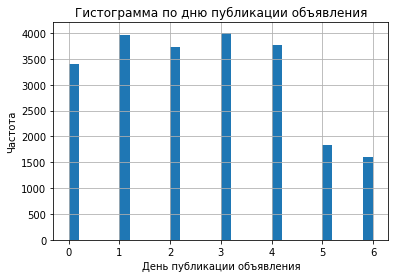

In [99]:
#Построим гистограмму по дню публикации объявления с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['day_of_week'].hist(bins=30)
# Добавим подписи осей и заголовка
plt.xlabel('День публикации объявления')
plt.ylabel('Частота')
plt.title('Гистограмма по дню публикации объявления')

Как видим по гистограмме, большинство объявлений было размещено в рабочие дни (наибольшее количество приходилось на вторник и четверг)

Text(0.5, 1.0, 'Гистограмма по месяцу публикации объявления')

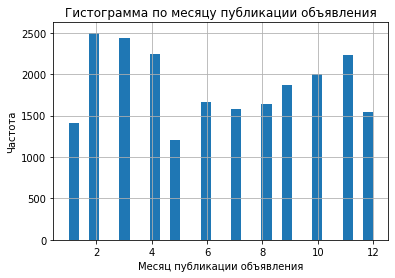

In [100]:
#Построим гистограмму по месяцу публикации объявления с помощью метода hist()
#Количество корзин и диапазон были выбраны после предварительного построения графика
data['month'].hist(bins=30)
# Добавим подписи осей и заголовка
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Частота')
plt.title('Гистограмма по месяцу публикации объявления')

Большинство объявлений было размещено с февраля по апрель и с сентября по ноябрь. Весна и осень часто считаются периодами, когда покупатели и продавцы более активны на рынке недвижимости. Февраль-апрель и сентябрь-ноябрь также соответствуют периодам окончания учебного года и начала нового. Многие семьи могут предпочитать переезжать в перерывы между учебными семестрами, особенно если они имеют детей в школьном возрасте.

Далее, изучим сколько дней продавалась квартира по столбцу days_exposition. Этот параметр показывает, сколько дней «висело» каждое объявление.

Text(0.5, 1.0, 'Гистограмма по количеству дней размещения объявление')

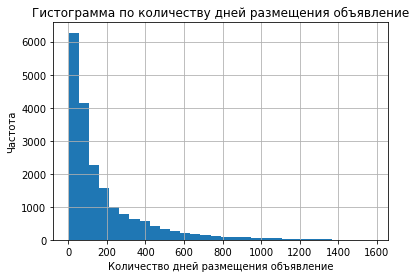

In [101]:
data['days_exposition'].hist(bins=30)
# Добавим подписи осей и заголовка
plt.xlabel('Количество дней размещения объявление')
plt.ylabel('Частота')
plt.title('Гистограмма по количеству дней размещения объявление')

Посчитаем среднее значение...
Посчитаем медиану...

In [102]:
#Посчитаем среднее значение
mean_days_exposition = data['days_exposition'].mean()

In [103]:
#Посчитаем медиану
median_days_exposition = data['days_exposition'].median()

In [104]:
mean_days_exposition

177.93958590852904

In [105]:
median_days_exposition

94.0

Как видим, значение median_days_exposition более правильно отражает реальное состояние. Согласно медианому значению обявления располагаются на сайте - 95 дней. Согласно среднему - ок 170. Продажи, завершившиеся в течение медианного времени (или менее) - могут считаться быстрыми. В данном случае, если продажа происходит в течение примерно 95 дней или менее, это может считаться быстрой продажей.
Продажи, которые занимают более среднего значения или близки к среднему, могут считаться более долгими. В данном случае, если продажа занимает более 170 дней, можно считать её необычно долгой.
Однако, концепция "быстро" или "долго" может варьироваться в зависимости от региона, текущей ситуации на рынке недвижимости и других факторов

На основе предварительного анализа данных объявлений о продаже квартир можно сделать следующие предварительные выводы:
Типичные параметры квартир:
Большинство квартир имеют среднюю общую площадь около 50 квадратных метров. Это может варьироваться от студий до трехкомнатных квартир.
Жилая площадь квартир чаще всего находится в диапазоне 20-30 квадратных метров.
Площадь кухни в большинстве случаев составляет около 10 квадратных метров.
Цены на квартиры обычно колеблются в пределах 5 миллионов рублей, хотя есть редкие объявления с более высокими ценами, достигающими 50-60 миллионов рублей.
Преобладающее количество объявлений относится к 1-3 комнатным квартирам.
Высота потолков в основном находится в диапазоне 2,5-2,7 метра, что соответствует стандартам для массового сегмента жилья.

Распределение по этажам и этажности:
Большинство квартир находится на первых этажах, однако также присутствует значительное количество квартир между первым и последним этажами.
Объявления о продаже квартир в основном представлены в зданиях с пяти и десятью этажами.

Расстояние от центра и аэропорта:
Большинство квартир расположено в пределах 20 км от центра города и аэропорта.
Есть некоторые квартиры, находящиеся на более удаленных расстояниях, что, вероятно, связано с наличием поселков и деревень в окружающих районах.

Распределение по времени:
Объявления о продаже чаще всего размещаются в будние дни, с наибольшим количеством во вторник и четверг.
Наибольшая активность объявлений наблюдается в феврале-апреле и сентябре-ноябре.

Время продажи:
Медианное время продажи составляет 95 дней, что можно считать типичным временем нахождения объявления на сайте.
Среднее время продажи равно 170 дням, но данное значение может быть искажено выбросами, поэтому важнее ориентироваться на медиану.
Рынок недвижимости в данном регионе представлен разнообразным предложением, особенно в сегменте квартир средней площади. Типичные параметры квартир соответствуют стандартам массового сегмента, их цены варьируются в зависимости от различных факторов. Активность на рынке наблюдается в определенные временные периоды, и типичное время продажи можно считать разумным для данного региона.

### Анализ зависимости стоимости квартир от разных факторов

Далее проведем оценку того, какие факторы больше всего влияют на общую (полную) стоимость объекта. 

#### Зависимость цены от общей площади квартиры

Начнем с оценки зависимости цены от общей площади квартиры

In [106]:
#Построим сводную таблицу
pivot_total_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median').reset_index()

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

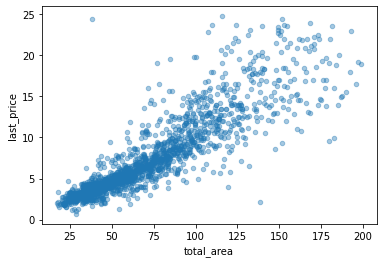

In [107]:
#Построим диаграмму рассеяния
pivot_total_area.plot(x='total_area', y='last_price', kind='scatter', alpha=0.4) 

С виду кажется что есть прямая зависимость (корреляция) между общей площадью и ценой квартиры. То, есть с увеличением площади растет и стоимость квартиры. Попробуем определить коэффициент корреляции Пирсона, для определения наличия линейной связи

In [108]:
#Псмотрим коэффициент корреляции Пирсона для неотфильтрованных данных
pivot_total_area['total_area'].corr(pivot_total_area['last_price'])

0.8845750177525005

Как видим, коэффициент корреляции положительный и близкий к 1ю

#### Зависимость цены от жилой площади квартиры

Далее оценим зависимость цены от жилой площади квартиры

In [109]:
#для начала также создадим сводную таблицу
pivot_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median').reset_index()

In [110]:
#Посмотрим на полученную таблицу
pivot_living_area.head()

,living_area,last_price
0,2.0,6.350
1,3.0,4.440
2,5.4,6.100
3,6.0,3.799
4,6.5,4.050


<AxesSubplot:xlabel='living_area', ylabel='last_price'>

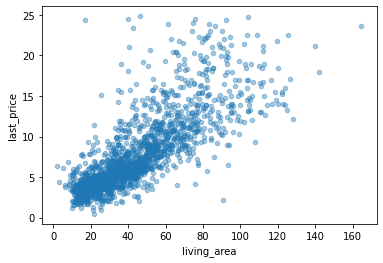

In [111]:
#Построим диаграмму рассеяния
pivot_living_area.plot(x='living_area', y='last_price', kind='scatter', alpha=0.4) 

In [112]:
#Посмотрим коэффициент корреляции Пирсона для полученных данных
pivot_living_area['living_area'].corr(pivot_total_area['last_price'])

0.882303930976062

Для этих данных также характерная прямая положительная корреляция между жилой площадью и стоимостью квартиры

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

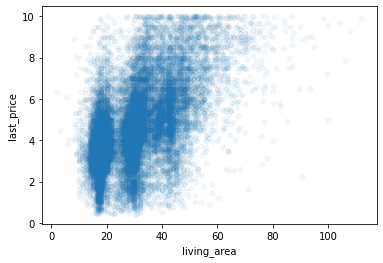

In [113]:
#Посмотрим поближе на данные с living_area <= 200 & 'last_price' <= 10 млн
filtered_data_living = data[(data['living_area'] <= 200) & (data['last_price'] <= 10)]
filtered_data_living.plot(x='living_area', y='last_price', kind='scatter', alpha=0.05) 

Тут уже видим более низкую корреляцию. Посчитаем коэффициент

In [114]:
#Определим коэффициент корреляции Пирсона
filtered_data_living['living_area'].corr(filtered_data_living['last_price'])

0.5413364797034076

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

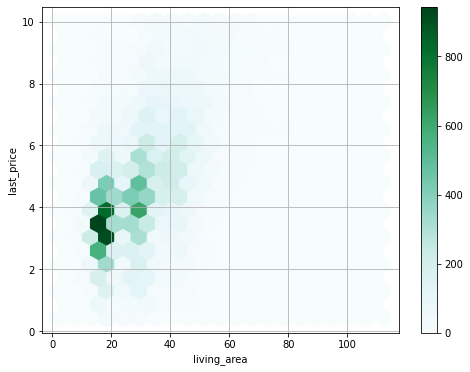

In [115]:
#Попробуем построить еще один тип диаграммы
filtered_data_living.plot(x='living_area', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

#### Зависимость цены  от площади кухни

Далее оценим зависимость цены от площади кухни

In [116]:
#для начала также создадим сводную таблицу
pivot_kitchen_area = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').reset_index()

In [117]:
#Посмотрим на полученную таблицу
pivot_kitchen_area.head()

,kitchen_area,last_price
0,3.20,6.000
1,3.22,2.050
2,3.30,3.650
3,3.33,1.737
4,3.37,2.190


<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

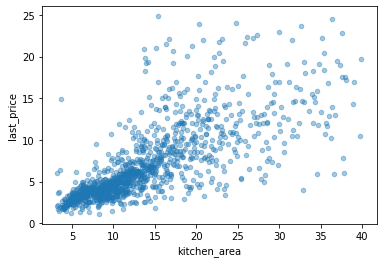

In [118]:
#Построим диаграмму рассеяния
pivot_kitchen_area.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.4) 

С виду кажется корреляция положительной. Оценим коэффициент корреляции Пирсона

In [119]:
#Посмотрим коэффициент корреляции Пирсона для полученных данных
pivot_kitchen_area['kitchen_area'].corr(pivot_total_area['last_price'])

0.7059019630315372

Корреляция прямая и положительная, ближе к 1.

#### Зависимость цены от количество комнат

Далее оценим зависимость цены от количество комнат

In [120]:
#для начала также создадим сводную таблицу
pivot_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median').reset_index()

In [121]:
#Посмотрим на полученную таблицу
pivot_rooms

,rooms,last_price
0,1,3.600
1,2,4.743
2,3,6.000
3,4,8.260
4,5,10.990


Text(0.5, 1.0, 'Зависимость цены от количество комнат')

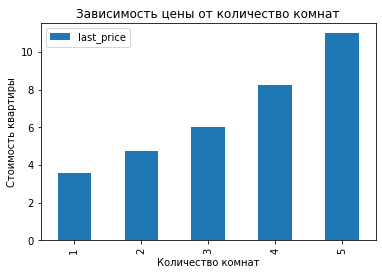

In [122]:
#Построим график
pivot_rooms.plot(x='rooms', y='last_price', kind='bar') 
# Добавим подписи осей и заголовка
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость цены от количество комнат')

Согласно полученным данным, чем больше количество комнат, тем больше стоимость квартиры (что логично, поскольку и больше площадь квартиры). 

#### Зависимость цены от типа этажа

Далее проанализируем как влияет тип этажа на стоимость квартиры

In [123]:
#для начала также создадим сводную таблицу
pivot_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median').reset_index()

In [124]:
#Посмотрим на полученную таблицу
pivot_floor_type

,floor_type,last_price
0,другой,4.75
1,первый,3.90
2,последний,4.20


Text(0.5, 1.0, 'Зависимость цены от типа этажа')

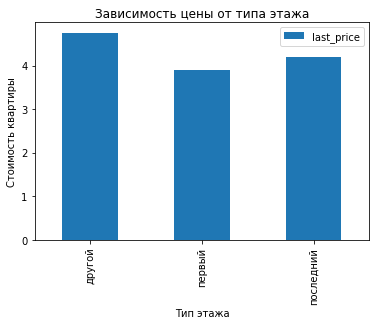

In [125]:
#Построим график
pivot_floor_type.plot(x='floor_type', y='last_price', kind='bar') 
# Добавим подписи осей и заголовка
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость цены от типа этажа')

Как видно из полученных данных, самая низкая стоимость у квартир, расположенных на первом этаже. Это может быть обьяснено возможными проблемами с безопасностью (например, доступность для посторонних),грызунами и насекомыми, или комфортом (шум от улицы). Это может снижать их цену. 
Чуть больше, но все же меньше чем средние этажи, стоят квартиры на последнем этаже. Квартиры на самом последнем этаже могут также иметь некоторые недостатки, которые могут сделать их менее привлекательными для определенных людей, и соответственно меньше стоить. Например, отсутствие лифта или проблемы с лифтом. В старых зданиях или в многоквартирных домах небольшой этажности может не быть лифта или он может быть ненадежным. Подниматься на верхний этаж без лифта может быть неудобным, особенно для пожилых людей или семей с маленькими детьми. Верхние этажи подвергаются прямому воздействию погодных условий, таких как дождь, снег и ветер. Это может привести к проблемам с утеплением крыши, если оно не поддерживается в хорошем состоянии. Протечки через крышу могут быть серьезной проблемой для верхних этажей. И другие проблемы...

#### Зависимость цены от даты размещения (день недели, месяц, год) объявления 

Далее проанализируем как влияет дата размещения (день недели, месяц, год) объявления на стоимость квартиры

In [126]:
#для начала также создадим сводную таблицу по дню недели
pivot_day_of_week = data.pivot_table(index='day_of_week', values='last_price', aggfunc='median').reset_index()

In [127]:
#Посмотрим на полученную таблицу
pivot_day_of_week

,day_of_week,last_price
0,0,4.5900
1,1,4.6500
2,2,4.6000
3,3,4.5325
4,4,4.5000
5,5,4.5000
6,6,4.5000


Text(0.5, 1.0, 'Зависимость цены от дня недели публикации объявления')

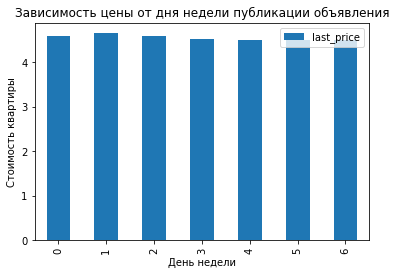

In [128]:
#Построим график
pivot_day_of_week.plot(x='day_of_week', y='last_price', kind='bar') 
# Добавим подписи осей и заголовка
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость цены от дня недели публикации объявления')

Судя по всему, в какой день опубликовано объявление не особо влияет на стоимость квартиры, что достаточно логично

<AxesSubplot:xlabel='day_of_week', ylabel='last_price'>

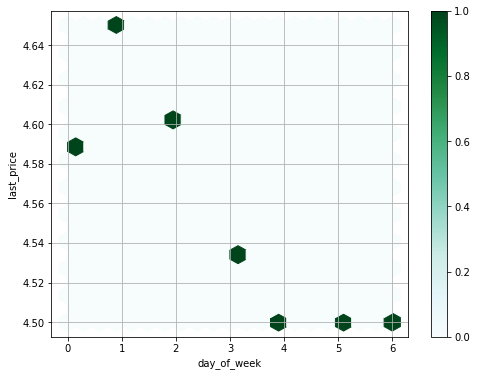

In [129]:
#Попробуем построить еще один тип диаграммы
pivot_day_of_week.plot(x='day_of_week', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Однако, если посмотреть в узком диапазоне, то можно отметить отрицательную корреляцию между днем недели и стоимостью. Чем ближе к выходным, тем ниже стоимость квартиры. Но разница небольшая

In [130]:
#создадим сводную таблицу по месяцу
pivot_month = data.pivot_table(index='month', values='last_price', aggfunc='median').reset_index()

In [131]:
#Посмотрим на полученную таблицу
pivot_month

,month,last_price
0,1,4.500
1,2,4.590
2,3,4.575
3,4,4.700
4,5,4.500
5,6,4.300
6,7,4.500
7,8,4.500
8,9,4.650
9,10,4.500


Text(0.5, 1.0, 'Зависимость цены от месяца публикации объявления')

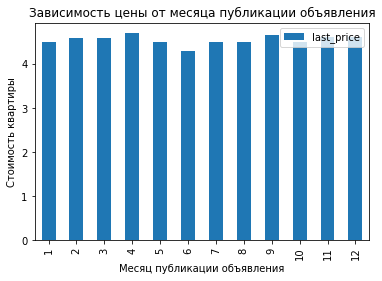

In [132]:
#Построим график
pivot_month.plot(x='month', y='last_price', kind='bar') 
# Добавим подписи осей и заголовка
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость цены от месяца публикации объявления')

<AxesSubplot:xlabel='month', ylabel='last_price'>

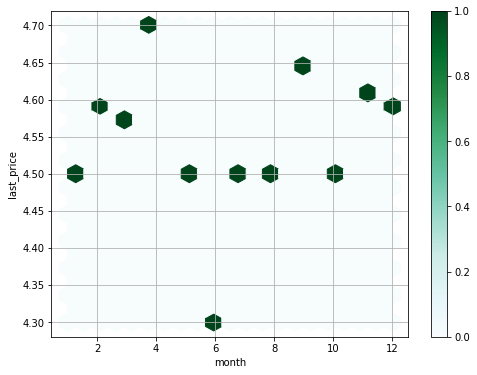

In [133]:
#Попробуем построить еще один тип диаграммы
pivot_month.plot(x='month', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Квартиры, выставленные в мае-августе были самые дешевые, самые дорогие - февраль-апрель и осенние месяцы. Но эта разница не такая большая. Распределение цен на квартиры в зависимости от месяца размещения объявлений может быть обусловлено несколькими факторами. Например, 1) сезонные колебания спроса и предложения. В различные времена года спрос на недвижимость может изменяться. Весной и осенью обычно наблюдается повышенный интерес к покупке квартир, что может повышать цены в эти периоды. 2)Школьный год. Многие семьи, особенно те, у которых есть дети, предпочитают переезжать летом, чтобы избежать нарушения учебного процесса. Поэтому в мае-июне спрос на жилье может быть ниже, что влияет на снижение цен. 3) Финансовые сезоны. Например, весной и летом многие люди получают налоговые возвраты или бонусы, что может увеличивать их покупательскую способность. Это также может влиять на повышение цен в это время года. 4) Планирование продаж. Продавцы могут стремиться продать свою недвижимость в периоды, когда спрос высок, что может привести к повышению цен. 5) Поведение продавцов. Некоторые продавцы могут ожидать, что весной и летом цены на рынке будут выше, и поэтому они предпочитают размещать свои объявления в этот период. 6) Праздничные сезоны. В некоторых культурах весна и лето могут быть временами отпусков и праздников, что может привести к уменьшению активности на рынке и снижению цен. И другие...

In [134]:
#создадим сводную таблицу по году
pivot_year = data.pivot_table(index='year', values='last_price', aggfunc='median').reset_index()

In [135]:
#Посмотрим на полученную таблицу
pivot_year

,year,last_price
0,2014,6.775
1,2015,5.100
2,2016,4.400
3,2017,4.450
4,2018,4.500
5,2019,4.990


Text(0.5, 1.0, 'Зависимость цены от года публикации объявления')

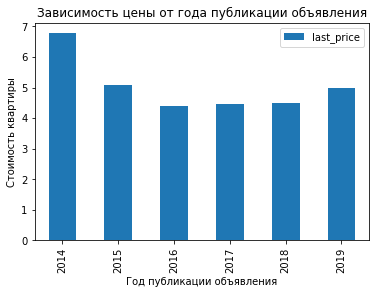

In [136]:
#Построим график
pivot_year.plot(x='year', y='last_price', kind='bar') 
# Добавим подписи осей и заголовка
plt.xlabel('Год публикации объявления')
plt.ylabel('Стоимость квартиры')
plt.title('Зависимость цены от года публикации объявления')

<AxesSubplot:xlabel='year', ylabel='last_price'>

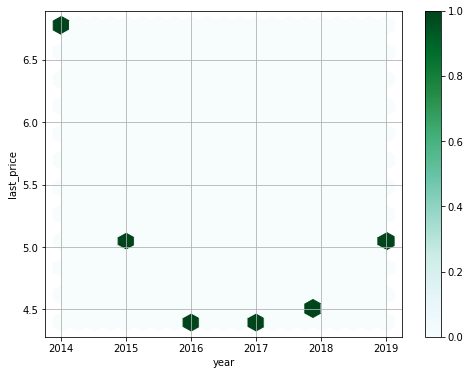

In [137]:
#Попробуем построить еще один тип диаграммы
pivot_year.plot(x='year', y='last_price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Согласно полученным данным, стоимость квартир снижалась с 2014-2016, после которого начался постепенный рост. Это также может быть объяснено некоторыми факторами. Например, в указанный период (2014-2016гг) Россия столкнулась с экономическими трудностями, в том числе с снижением цен на нефть, санкциями и общей нестабильностью в экономике. Это могло привести к ухудшению финансовой ситуации населения и снижению спроса на недвижимость, что в свою очередь повлияло на снижение цен.Политические и социальные события также могут оказывать влияние на рынок недвижимости. Например, влияние санкций, изменения в правительственной политике или другие события, которые могут воздействовать на доверие и уверенность в будущем. Периоды снижения цен могут также свидетельствовать о повышенной строительной активности, что приводит к увеличению предложения на рынке. В последующие годы спрос может увеличиваться, и цены могут расти в ответ на это повышенное внимание к недвижимости.
Кроме того, рынок недвижимости имеет свои циклы, включая периоды подъема и спада. После периода спада, который вы отметили с 2014 по 2016 год, скорее всего начался период восстановления и роста.

### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Далее попытаемся выделить населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [138]:
#Найдем 10 населённых пунктов с наибольшим числом объявлений
top_localities = data['locality_name'].value_counts().head(10)

In [139]:
#Выведем на экран 10 населённых пунктов с наибольшим числом объявлений
top_localities

Санкт-Петербург      14594
поселок Мурино         522
деревня Кудрово        448
поселок Шушары         433
Всеволожск             389
Пушкин                 348
Колпино                336
поселок Парголово      321
Гатчина                305
Выборг                 230
Name: locality_name, dtype: int64

In [140]:
#Выбраем только строки, относящиеся к выбранным населённым пунктам
selected_localities_data = data[data['locality_name'].isin(top_localities.index)]

In [141]:
# Рассчитаем среднюю цену за квадратный метр для каждого населённого пункта
avg_price_per_sqm = selected_localities_data.groupby('locality_name')['price_per_square_meter'].mean()

In [142]:
#Выведем на экран среднюю цену за квадратный метр для каждого населённого пункта
avg_price_per_sqm.sort_values(ascending=False)

locality_name
Санкт-Петербург      109218.423501
Пушкин               102010.777730
деревня Кудрово       95083.876696
поселок Парголово     90479.242305
поселок Мурино        84984.395402
поселок Шушары        78279.779007
Колпино               75352.475595
Гатчина               68811.372590
Всеволожск            68579.740283
Выборг                58243.557826
Name: price_per_square_meter, dtype: float64

Согласно полученным, наибольшей стоимостью обладают квартиры в Санкт-Петербурге(что логично) и Пушкине, а наименьшей - в Выборге и Всеволжске

### Средняя цена каждого километра в Санкт-Петербурге

Далее вычислим среднюю цену каждого километра в Санкт-Петербурге.

In [143]:
#отфильтруем данные по Санкт-Петербургу и также возьмем только 1-3 комнатные квартиры (поскольку это наиболее популярные
#квартиры, и позволит исключить такие выбросы как 12-15 комнатные квартиры и тд)
spb_data = data[(data['locality_name'] == 'Санкт-Петербург') & (data['rooms'].isin([1, 2, 3]))].copy()

In [144]:
#Рассчитаем среднюю цену для каждого километра
average_price_per_km = spb_data.groupby('cityCenters_nearest_km')['last_price'].mean().reset_index()

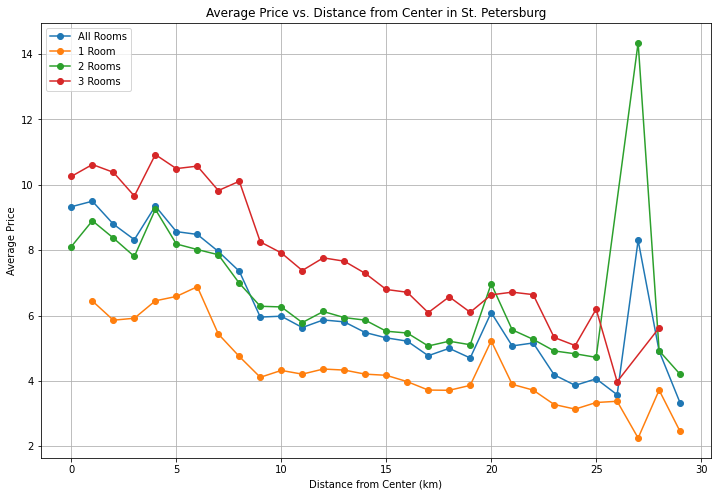

In [145]:
#Построим графики в зависимости от типа квартиры (количества комнат)
rooms_1 = spb_data[spb_data['rooms'] == 1]
rooms_2 = spb_data[spb_data['rooms'] == 2]
rooms_3 = spb_data[spb_data['rooms'] == 3]

plt.figure(figsize=(12, 8))

plt.plot(average_price_per_km['cityCenters_nearest_km'], average_price_per_km['last_price'], label='All Rooms', marker='o')
plt.plot(rooms_1.groupby('cityCenters_nearest_km')['last_price'].mean(), label='1 Room', marker='o')
plt.plot(rooms_2.groupby('cityCenters_nearest_km')['last_price'].mean(), label='2 Rooms', marker='o')
plt.plot(rooms_3.groupby('cityCenters_nearest_km')['last_price'].mean(), label='3 Rooms', marker='o')

plt.title('Average Price vs. Distance from Center in St. Petersburg')
plt.xlabel('Distance from Center (km)')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

Судя по всему, чем ближе к центру, тем дороже квартира, за исключением некоторых выбросов

#### Вывод: 
При анализе данных были выявлены следующие закономерности:
Общая площадь и цена квартиры:
Существует прямая зависимость (корреляция) между общей площадью и ценой квартиры. Увеличение площади ведет к росту стоимости квартиры.

Этаж квартиры:
Квартиры на первом этаже имеют самую низкую стоимость, что может быть обусловлено проблемами безопасности, комфорта или наличием грызунов.
Квартиры на последнем этаже также чуть дешевле средних этажей. Это может быть связано с отсутствием лифта, погодными условиями и другими факторами, делающими их менее привлекательными.

Время публикации объявления:
День недели слабо влияет на стоимость квартиры, хотя в узком диапазоне можно отметить отрицательную корреляцию между выходными и стоимостью.
В течение года есть небольшие колебания в ценах, но разница не так велика. Наиболее дешевые квартиры чаще всего размещаются в мае-августе, а самые дорогие - в февраль-апрель и осенние месяцы.

Динамика цен:
Стоимость квартир снижалась с 2014 по 2016 год, а затем начался постепенный рост. Это может быть связано с общей динамикой рынка недвижимости.

Распределение по населённым пунктам:
Квартиры в Санкт-Петербурге и Пушкине имеют наивысшую стоимость, а в Выборге и Всеволжске - наименьшую. Стоимость квартир коррелирует с близостью к центру города.
В целом, результаты анализа позволяют сформулировать вывод о том, что стоимость квартиры в значительной степени зависит от её параметров, таких как площадь, этаж, местоположение и временные факторы. 

### Общий вывод

- В ходе проведения исследования были проанализированы полученные данные, определены пропущенные значения, затем заполнены там, где это было возможно, с пояснением об обнаруженных пропусках. Произведено изменение типов данных в некоторых столбцах, а именно: first_day_exposition был преобразован в формат даты, floors_total в целочисленный, balcony в целочисленный, и тд. Эти изменения были обусловлены удобством дальнейшей работы с данными. Устранены неявные дубликаты в названиях населённых пунктов и произведена фильтрация редких и выбивающихся значений (аномалий). Посчитаны и добавлены в таблицу следующие новые данные, такие как цена одного квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры, расстояние в км до центра города.
- После проведенной предобработки данных, были изучены и описаны имеющиеся объявления (квартиры)различные параметры, такие как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков и др. Построены гистограммы для каждого параметра. Изучено среднее и медианное время продажи квартир.
- В дальнейшем были определены факторы, влияющих на общую стоимость объекта, построены графики зависимости цены от различных параметров. Рассчитана средняя цена каждого километра от центра для квартир в Санкт-Петербурге.
- На основе анализа данных о продаже квартир можно выделить типичные характеристики жилья в регионе: средняя общая площадь около 50 кв.м, цены в пределах 5 млн рублей, преобладание 1-3 комнатных квартир. Объявления чаще всего касаются квартир на первых этажах зданий с пятью и десятью этажами.
- Расстояние до центра и аэропорта влияет на ценообразование, с большинством квартир, расположенных в пределах 20 км. Объявления активнее размещаются в будние дни, а пиковая активность - в феврале-апреле и сентябре-ноябре.
- Среднее время продажи квартир составляет 95 дней, при средней стоимости 5 млн рублей. Однако, стоит остерегаться выбросов, влияющих на среднее время продажи.
- Анализ показал, что цена квартиры тесно связана с её параметрами: общей площадью, этажом, временем публикации. Рынок представлен разнообразным предложением, исследование которого может помочь в выработке успешных стратегий продаж и покупок недвижимости в регионе.